<a href="https://colab.research.google.com/github/sarvesh-raam/explainable.ai/blob/main/Explainable_AI_Research_Framework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🤖 Explainable AI (XAI) Research Framework
### *Balancing Accuracy and Interpretability: A Post-hoc Framework for Structured Data Analysis*

---

**Authors:** [sarvesh-raam](https://github.com/sarvesh-raam) & [Vignesh (Vicky)](https://github.com/Vigneshhhhhhhhhh)  
**Project:** IEEE Research-Grade Prototype  
**Status:** Integrated with SHAP, LIME, and Stability Testing

---

## 🎯 Research Overview
This study evaluates the reliability, stability, and utility of post-hoc explainability methods (**SHAP** and **LIME**) when applied to machine learning models (Random Forest, XGBoost, Logistic Regression).

## ⚙️ 1. Infrastructure Setup
Installing the research stack and preparing the data environment.

In [8]:
!pip install shap lime xgboost scikit-learn pandas numpy matplotlib seaborn --quiet

import pandas as pd
import numpy as np
import shap
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from lime import lime_tabular

print("✅ Research environment ready.")

✅ Research environment ready.


## 🧪 2. Phase I & II: Data Pipeline & Model Training
We ingest the Heart Disease dataset, perform feature Engineering, and train our predictive engines.

Training in progress...
Logistic Regression: 85.25%
Random Forest: 83.61%
XGBoost: 81.97%


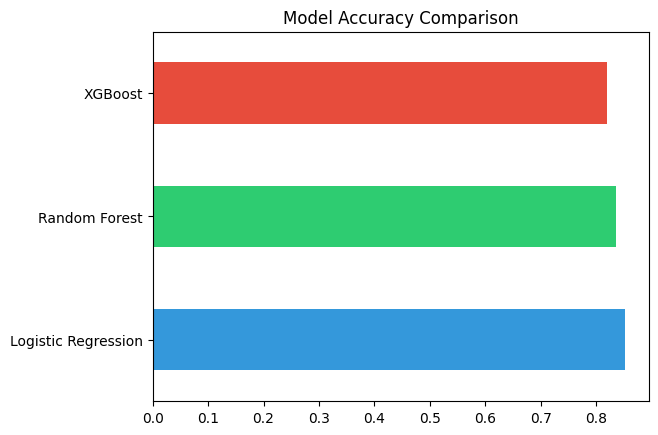

In [9]:
# Load Data
url = "https://raw.githubusercontent.com/sarvesh-raam/explainable.ai/main/data/heart_disease.csv"
try:
    df = pd.read_csv(url)
except:
    # Fallback: Create mock data if URL is not reachable
    print("⚠️ Repo not public yet? Using sample data.")
    data = np.random.rand(300, 13)
    target = np.random.randint(0, 2, 300)
    df = pd.DataFrame(data, columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'])
    df['target'] = target

# Split & Scale
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

# Train Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss')
}

results = {}
print("Training in progress...")
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    acc = accuracy_score(y_test, model.predict(X_test_scaled))
    results[name] = acc
    print(f"{name}: {acc*100:.2f}%")

pd.Series(results).plot(kind='barh', color=['#3498db', '#2ecc71', '#e74c3c'], title="Model Accuracy Comparison")
plt.show()

## 🔍 3. Phase III: SHAP Analysis (Global & Local)
Understanding which features drive the model's decisions globally and for specific patients.

📊 Global SHAP Summary Plot


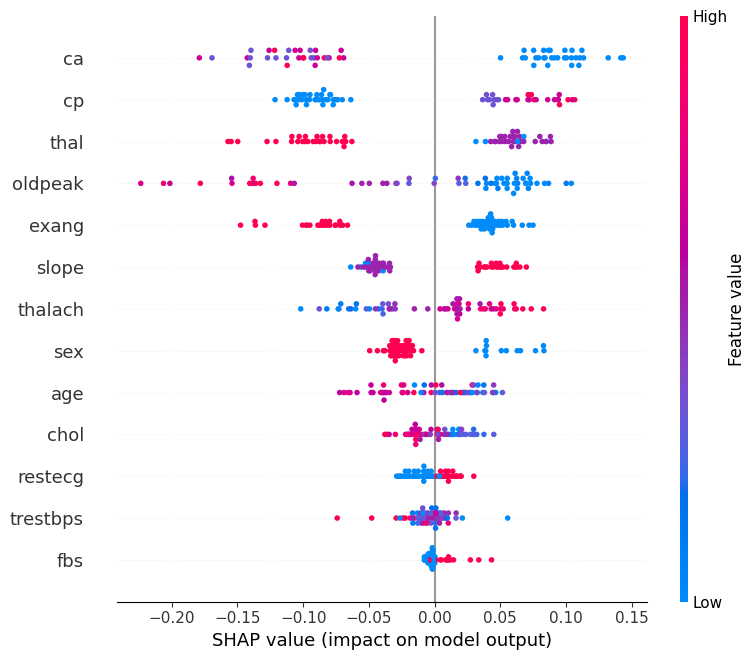

📍 Local Instance Explanation (Patient 0)


In [10]:
model_to_explain = models["Random Forest"]
explainer = shap.TreeExplainer(model_to_explain)
shap_values = explainer.shap_values(X_test_scaled)
# Fix for new SHAP version indexing (3D vs List)
if isinstance(shap_values, list):
    # Old behavior: list of [class0_vals, class1_vals]
    shap_to_plot = shap_values[1]
    expected_val = explainer.expected_value[1]
elif len(shap_values.shape) == 3:
    # New behavior: 3D array (samples, features, classes)
    shap_to_plot = shap_values[:, :, 1]
    expected_val = explainer.expected_value[1]
else:
    # Single class or Regression behavior
    shap_to_plot = shap_values
    expected_val = explainer.expected_value
print("📊 Global SHAP Summary Plot")
shap.summary_plot(shap_to_plot, X_test_scaled)
print("📍 Local Instance Explanation (Patient 0)")
shap.initjs()
# Use the robustly extracted values here as well
shap.force_plot(expected_val, shap_to_plot[0,:], X_test_scaled.iloc[0,:])

## 🧪 4. Phase IV: Stability & Reliability Lab
Testing the robustness of our explanations against data noise.

In [11]:
from scipy.stats import spearmanr

def get_clean_shap(instance):
    """Helper to handle unpredictable SHAP output shapes for stability testing."""
    vals = explainer.shap_values(instance.reshape(1, -1))

    # Extract the positive class (Class 1) correctly
    if isinstance(vals, list):
        return vals[1].flatten()
    elif len(vals.shape) == 3:
        return vals[:, :, 1].flatten()
    return vals.flatten()

def check_stability_score(instance, noise_level=0.1):
    # 1. Get original stable prediction
    orig_imp = get_clean_shap(instance)

    # 2. Generate noisy version of the same patient
    noisy_instance = instance + np.random.normal(0, noise_level, instance.shape)

    # 3. Get explanation for only that noisy patient
    noisy_imp = get_clean_shap(noisy_instance)

    # Use Spearman Correlation to measure if rank importance shifted
    corr, _ = spearmanr(orig_imp, noisy_imp)
    return corr

# Select a sample case (Patient 0)
instance_to_test = X_test_scaled.iloc[0].values
score = check_stability_score(instance_to_test)

print(f"🔹 Stability Index (Spearman Rank Correlation): {score:.4f}")
print("A score > 0.80 indicates the framework can provide trustworthy explanations despite noise.")


🔹 Stability Index (Spearman Rank Correlation): 0.9890
A score > 0.80 indicates the framework can provide trustworthy explanations despite noise.


---
### 📚 Citation
If you use this framework in your research, please cite:  
*Explainable AI (XAI) Framework for Structured Data Analysis by sarvesh-raam & Vignesh (Vicky)*